
Posibilidades: 
    
    - Probar con otras columnas de renta
    - Invertir la prueba: a partir de las columnas de renta (de las 4) intentar deducir por ejemplo el número de verbos en futuro (tendría más sentido para las personas)
    - Cambiar a clasificación: crear una columna especial para rentas por tramos

In [12]:
datos = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweet_feat_renta.csv"
import pandas as pd

df = pd.read_csv(datos)
df.columns

Index(['id', 'screen_name', 'text', 'location', 'localidad', 'provincia',
       'distrito', 'seccion', 'hora', 'verified', 'friends_count', 'followers',
       'tweets', ''¡'', ''!'', ''¿'', ''?'', 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom', 'sentiment'],
      dtype='object')

In [13]:
cols_numericas = ['hora', 'verified', 'friends_count', 'followers',
       'tweets', "'¡'", "'!'", "'¿'", "'?'", 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'cambio1518', 'mediana', 'rentapais',
       'rentacom', 'sentiment']
df = df[cols_numericas]

cols_norenta = ['hora', 'verified', #'friends_count', 'followers',
       #'tweets', 
       "'¡'", "'!'", "'¿'", "'?'", 'URLs', 'adjetivos', 'emojis',
       'gerundio', 'hashtags', 'infinitivo', 'longitud media palabras',
       'mayúsculas', 'menciones', 'modo imperativo', 'modo indicativo',
       'modo subjuntivo', 'números', 'palabras', 'palabras vacías',
       'participio', 'plural', 'primera persona', 'segunda persona',
       'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos',  'sentiment']
cols_renta = ['cambio1518', 'mediana', 'rentapais',
       'rentacom']

X = df[cols_norenta]


In [6]:
for col in cols_renta:
    y = df[col]
    print(y)

0         9
1         9
2         9
3         9
4         9
         ..
80015    -5
80016    11
80017    16
80018     9
80019     7
Name: cambio1518, Length: 80020, dtype: int64
0        17850.0
1        17850.0
2        17850.0
3        17850.0
4        17850.0
          ...   
80015    12950.0
80016    14350.0
80017    15050.0
80018    24850.0
80019    20650.0
Name: mediana, Length: 80020, dtype: float64
0        73.5
1        73.5
2        73.5
3        73.5
4        73.5
         ... 
80015    21.5
80016    37.0
80017    44.5
80018    94.5
80019    86.0
Name: rentapais, Length: 80020, dtype: float64
0        48.0
1        48.0
2        48.0
3        48.0
4        48.0
         ... 
80015    10.0
80016    12.0
80017    36.0
80018    92.5
80019    63.5
Name: rentacom, Length: 80020, dtype: float64


In [15]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import svm
import warnings
listaResultados=[]
warnings.filterwarnings("ignore")
for col in cols_renta:
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    #meter métodos
    metodos = [XGBRegressor(),                            SGDRegressor(),     GradientBoostingRegressor(),
               LinearRegression(),                        svm.SVR(),          Ridge(alpha=.5),    
               RidgeCV(alphas=np.logspace(-6, 6, 13)),    Lasso(alpha=0.1),
               LassoLars(alpha=.1, normalize=False),      BayesianRidge(),   # TweedieRegressor(power=1, alpha=0.5, link='log'),
               Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])]
    for metodo in metodos:
        print(metodo)
        modelo = metodo.fit(X_train, y_train) # entrenar
        y_mean  = np.mean(y_train)
        y_pred_naive=[y_mean]*len(y_test)

        y_pred  = modelo.predict(X_test)

        mae = mean_absolute_error(y_pred,y_test)
        #r2 = r2_score(y_pred,y_test)
        listaResultados.append((metodo,round(mae,4)))

        print(round(mae,4),end=". Naive ")
        mae = mean_absolute_error(y_pred_naive,y_test)
        print(round(mae,4))





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
3.8549. Naive 4.123
SGDRegressor()
32544.367. Naive 4.123
GradientBoostingRegressor()
3.9882. Naive 4.123
LinearRegression()
4.0873. Naive 4.123
SVR()
3.9681. Naive 4.123
Ridge(alpha=0.5)
4.0873. Naive 4.123
RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 

In [19]:
for trio in listaResultados:
    print(trio[0],'     mae:',trio[1],'\n')

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)      mae: 3.8549 

SGDRegressor()      mae: 32544.367 

GradientBoostingRegressor()      mae: 3.9882 

LinearRegression()      mae: 4.0873 

SVR()      mae: 3.9681 

Ridge(alpha=0.5)      mae: 4.0873 

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 

In [20]:
X.columns

Index(['hora', 'verified', ''¡'', ''!'', ''¿'', ''?'', 'URLs', 'adjetivos',
       'emojis', 'gerundio', 'hashtags', 'infinitivo',
       'longitud media palabras', 'mayúsculas', 'menciones', 'modo imperativo',
       'modo indicativo', 'modo subjuntivo', 'números', 'palabras',
       'palabras vacías', 'participio', 'plural', 'primera persona',
       'segunda persona', 'tercera persona', 'proporción palabras correctas',
       'sentimiento medio emojis', 'singular', 'sustantivos',
       'tiempo condicional', 'tiempo futuro', 'tiempo pasado',
       'tiempo presente', 'verbos', 'sentiment'],
      dtype='object')

<AxesSubplot:>

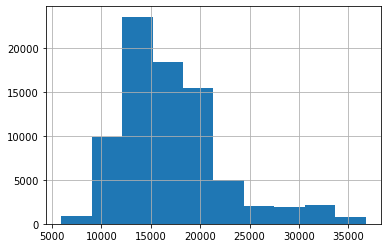

In [21]:
df.mediana.hist()

In [22]:
mean_absolute_error(y_pred,y_test)

28.71808007152646

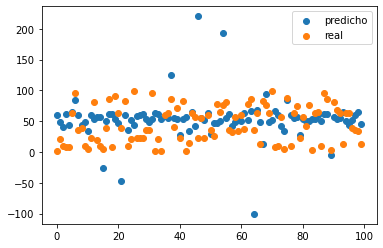

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

muestra = 100
x_plot = range(len(y_pred))
plt.scatter(x_plot[0:muestra],y_pred[0:muestra],label="predicho")
plt.scatter(x_plot[0:muestra],y_test[0:muestra],label="real")
plt.legend()

In [24]:
y_mean = np.mean(y_train)
y_mean

54.82998526476787

In [25]:
y_pred = [y_mean]*len(y_test)
y_pred

[54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,
 54.82998526476787,


In [26]:
mean_absolute_error(y_pred,y_test)

25.91265496990758

# clasificación

La etiqueta y toma una cantidad finita (y pequeña) de valores

In [3]:
df

,hora,verified,friends_count,followers,tweets,'¡','!','¿','?',URLs,...,tiempo condicional,tiempo futuro,tiempo pasado,tiempo presente,verbos,cambio1518,mediana,rentapais,rentacom,sentiment
0,18,0,1661,1059,34809,0,0,0,0,0,...,0,0,0,2,2,9,17850.0,73.5,48.0,-0.735980
1,14,0,1661,1059,34809,0,3,0,1,0,...,0,0,2,3,10,9,17850.0,73.5,48.0,-0.670090
2,14,0,1661,1059,34809,1,1,0,0,0,...,0,0,0,1,4,9,17850.0,73.5,48.0,0.926692
3,16,0,1661,1059,34809,0,0,0,0,1,...,0,0,0,1,1,9,17850.0,73.5,48.0,-0.888506
4,18,0,1661,1059,34809,0,0,0,0,0,...,0,0,0,6,7,9,17850.0,73.5,48.0,-0.416854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80015,16,0,1844,643,2108,0,0,0,1,4,...,0,0,0,3,3,-5,12950.0,21.5,10.0,0.000000
80016,15,0,2050,1012,11556,0,0,0,1,0,...,0,0,0,3,5,11,14350.0,37.0,12.0,0.878134
80017,13,0,173,182,179,0,0,0,0,1,...,0,0,0,0,0,16,15050.0,44.5,36.0,0.960855
80018,15,0,408,2173,2158,0,0,0,0,1,...,0,0,0,0,0,9,24850.0,94.5,92.5,0.785475


In [14]:
# 4
def discretizar(mediana):
    if mediana<q[0]:
        return 0
    elif mediana<q[1]:
        return 1
    elif mediana<q[2]:
            return 2
    else:
        return 3
    
  

q = [df.mediana.quantile(q=0.25), df.mediana.quantile(q=0.5), df.mediana.quantile(q=0.75)]

df["renta_discreta4"] = df.mediana.apply(discretizar)
q = [df.cambio1518.quantile(q=0.25), df.cambio1518.quantile(q=0.5), df.cambio1518.quantile(q=0.75)]

df["cambio1518_discreto4"] = df.cambio1518.apply(discretizar)

y1 = df["renta_discreta4"]
y2 = df["cambio1518_discreto4"]

df

,hora,verified,friends_count,followers,tweets,'¡','!','¿','?',URLs,...,tiempo pasado,tiempo presente,verbos,cambio1518,mediana,rentapais,rentacom,sentiment,renta_discreta4,cambio1518_discreto4
0,18,0,1661,1059,34809,0,0,0,0,0,...,0,2,2,9,17850.0,73.5,48.0,-0.735980,2,1
1,14,0,1661,1059,34809,0,3,0,1,0,...,2,3,10,9,17850.0,73.5,48.0,-0.670090,2,1
2,14,0,1661,1059,34809,1,1,0,0,0,...,0,1,4,9,17850.0,73.5,48.0,0.926692,2,1
3,16,0,1661,1059,34809,0,0,0,0,1,...,0,1,1,9,17850.0,73.5,48.0,-0.888506,2,1
4,18,0,1661,1059,34809,0,0,0,0,0,...,0,6,7,9,17850.0,73.5,48.0,-0.416854,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80015,16,0,1844,643,2108,0,0,0,1,4,...,0,3,3,-5,12950.0,21.5,10.0,0.000000,0,0
80016,15,0,2050,1012,11556,0,0,0,1,0,...,0,3,5,11,14350.0,37.0,12.0,0.878134,1,2
80017,13,0,173,182,179,0,0,0,0,1,...,0,0,0,16,15050.0,44.5,36.0,0.960855,1,3
80018,15,0,408,2173,2158,0,0,0,0,1,...,0,0,0,9,24850.0,94.5,92.5,0.785475,3,1


In [15]:
# 2
def discretizar(mediana):
    if mediana<q[0]:
        return 0
    elif mediana<q[1]:
        return 1
    else:
        return 2
    


q = [df.mediana.quantile(q=0.3333333333333333333333), df.mediana.quantile(q=0.666666666666666666666)]
df["renta_discreta3"] = df.mediana.apply(discretizar)
q = [df.cambio1518.quantile(q=0.3333333333333333333333), df.cambio1518.quantile(q=0.666666666666666666666)]

df["cambio1518_discreto3"] = df.cambio1518.apply(discretizar)

y1 = df["renta_discreta3"]
y2 = df["cambio1518_discreto3"]


df

,hora,verified,friends_count,followers,tweets,'¡','!','¿','?',URLs,...,verbos,cambio1518,mediana,rentapais,rentacom,sentiment,renta_discreta4,cambio1518_discreto4,renta_discreta3,cambio1518_discreto3
0,18,0,1661,1059,34809,0,0,0,0,0,...,2,9,17850.0,73.5,48.0,-0.735980,2,1,1,1
1,14,0,1661,1059,34809,0,3,0,1,0,...,10,9,17850.0,73.5,48.0,-0.670090,2,1,1,1
2,14,0,1661,1059,34809,1,1,0,0,0,...,4,9,17850.0,73.5,48.0,0.926692,2,1,1,1
3,16,0,1661,1059,34809,0,0,0,0,1,...,1,9,17850.0,73.5,48.0,-0.888506,2,1,1,1
4,18,0,1661,1059,34809,0,0,0,0,0,...,7,9,17850.0,73.5,48.0,-0.416854,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80015,16,0,1844,643,2108,0,0,0,1,4,...,3,-5,12950.0,21.5,10.0,0.000000,0,0,0,0
80016,15,0,2050,1012,11556,0,0,0,1,0,...,5,11,14350.0,37.0,12.0,0.878134,1,2,1,1
80017,13,0,173,182,179,0,0,0,0,1,...,0,16,15050.0,44.5,36.0,0.960855,1,3,1,2
80018,15,0,408,2173,2158,0,0,0,0,1,...,0,9,24850.0,94.5,92.5,0.785475,3,1,2,1


0.283920436823226
0.5465505923510272
              precision    recall  f1-score   support

           0       0.38      0.54      0.45      5517
           1       0.62      0.54      0.58     11127
           2       0.56      0.51      0.53      9763

    accuracy                           0.53     26407
   macro avg       0.52      0.53      0.52     26407
weighted avg       0.55      0.53      0.53     26407

0.2203645009601677
0.5478207737345372
              precision    recall  f1-score   support

           0       0.24      0.55      0.34      3419
           1       0.62      0.50      0.55     12209
           2       0.56      0.46      0.51     10779

    accuracy                           0.49     26407
   macro avg       0.48      0.50      0.47     26407
weighted avg       0.55      0.49      0.51     26407

0.0
1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53   

C:\Users\noeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2606140433938653
0.5468690230945027
              precision    recall  f1-score   support

           0       0.40      0.57      0.47      5559
           1       0.45      0.49      0.47      7484
           2       0.66      0.52      0.58     13364

    accuracy                           0.52     26407
   macro avg       0.50      0.52      0.51     26407
weighted avg       0.55      0.52      0.53     26407

0.13516150762626244
0.7730940192538605
              precision    recall  f1-score   support

           0       0.20      0.61      0.31      2614
           1       0.15      0.59      0.24      2101
           2       0.90      0.43      0.58     21692

    accuracy                           0.46     26407
   macro avg       0.42      0.54      0.38     26407
weighted avg       0.77      0.46      0.53     26407

0.0
1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00 

C:\Users\noeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


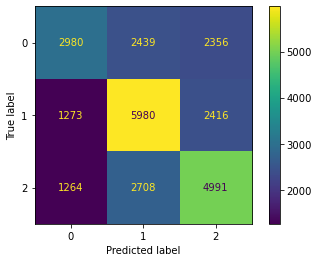

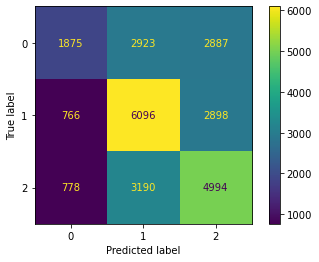

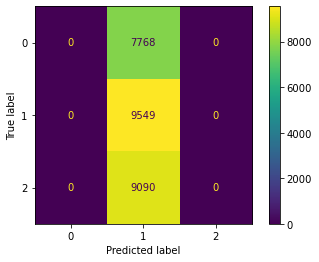

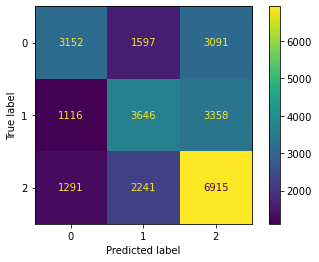

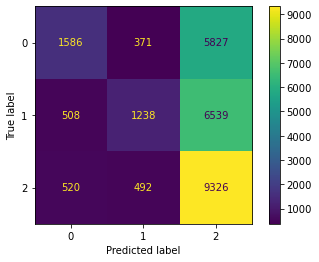

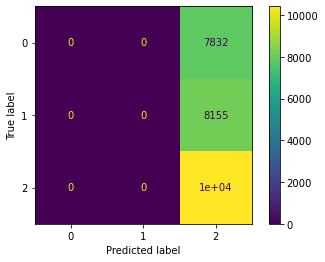

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split



#cambiar hiperparámetros
def variosHiperparam(y,p1=100,p2="gini",p3=None,p4=2,p5=1,p6=0.0,p7="auto",p8=None,p9=0.0,p10=True
,p11=False,p12=None,p13=0,p14=False,p15=None,p16=0.0,p17=None):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    metodo = RandomForestClassifier(n_estimators=p1,criterion=p2,max_depth=p3,
                                   min_samples_split=p4,min_samples_leaf=p5,
                                   min_weight_fraction_leaf=p6,max_features=p7,
                                   max_leaf_nodes=p8,min_impurity_decrease=p9,
                                   bootstrap=p10,oob_score=p11,n_jobs=p12,verbose=p13,
                                   warm_start=p14,class_weight=p15,ccp_alpha=p16,
                                   max_samples=p17) # esto se cambiaría por otro método

    modelo = metodo.fit(X_train, y_train) # entrenar
    y_pred  = modelo.predict(X_test)

    ### mirar el error
    plot_confusion_matrix(modelo, X_test, y_test)  
    print(cohen_kappa_score(y_pred, y_test)) # 0 y 1
    print(precision_score(y_pred, y_test, average='weighted'))
    s = classification_report(y_pred, y_test)
    print(s)
    
variosHiperparam(y1,p1=1000,p2="entropy")
variosHiperparam(y1,p3=9,p4=3,p5=3)
variosHiperparam(y1,p7="sqrt",p9=0.5)
variosHiperparam(y2,p1=1000,p2="entropy")
variosHiperparam(y2,p3=9,p4=3,p5=3)
variosHiperparam(y2,p7="sqrt",p9=0.5)



In [31]:
len(y_test)

26407

In [32]:
sum(y_test==0)

7730